# 5.0-scRepertoire per timepoint

**Inés Sentís**

Date of execution 

In [1]:
Sys.Date()

[1] "2025-01-27"

## Introduction

Use [scRepertoire](https://www.borch.dev/uploads/vignette/vignette) to explore clonotypes

## Libraries

In [2]:
options(warn = -1, verbose = FALSE)
suppressMessages(suppressWarnings({
library(Seurat)
library(scRepertoire)
library(here)
library(glue)
library(tidyverse)
library(ggplot2)
library(dplyr)
library(ComplexHeatmap)
}))

## Parameters

In [3]:
#dr_here(show_reason = TRUE)
source(here("utils/bin.R"))
source(here("utils/style.R"))
source(here("SCGRES_83_120/misc/paths.R"))


"{tcr}/{plt_dir}" %>%
  glue::glue() %>%
  here::here() %>%
  dir.create(path = .,
           showWarnings = FALSE,
           recursive = TRUE)

"{tcr}/{robj_dir}" %>%
  glue::glue() %>%
  here::here() %>%
  dir.create(path = .,
           showWarnings = FALSE,
           recursive = TRUE)

set.seed(0)

`mode` = "gene", "nt", "aa", "strict" (same as scRepetoire)

`chain` = "both", "TRB" (use both alpha and beta chains to call clones or just the beta one )

In [4]:
# depending on clone call
mode = "nt" 
chain = "TRB"

In [5]:
lvl ="Tcell_clusters"

In [6]:
cd8_clusters <- c("4", "5_0", "6", "9", "13", "14_1")
cd4_clusters <- c("0", "1", "2","3","5_1", "7", "8", "10", "12")
others <- c("11", "14_0", "15")

## Load data

In [7]:
source(here("SCGRES_83_84/sc_analysis/misc/paths.R"))
metadata <- read.csv(here(glue("{cellranger}/metadata.csv")))

In [8]:
list_contigs <- purrr::map(list.dirs(path = here(glue("{cellranger}/jobs")), full.names = FALSE, recursive = FALSE), function(lib){
    print(lib)
    info <- subset(metadata, type == "cDNA" & gem_id == lib)
    data <- read_csv(here(glue("{cellranger}/jobs/{lib}/{lib}/outs/per_sample_outs/{lib}/vdj_t/filtered_contig_annotations.csv")))
    data$sample_org <- lib
    data$timepoint <- info$timepoint
    data$replicate <- info$replicate
    data$sample_id <- paste(info$timepoint,  info$replicate, sep="_")
    data
    })

[1] "OS0007_1"


Rows: 5760 Columns: 31
── Column specification ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (23): barcode, contig_id, chain, v_gene, d_gene, j_gene, c_gene, fwr1, f...
dbl  (4): length, reads, umis, exact_subclonotype_id
lgl  (4): is_cell, high_confidence, full_length, productive

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] "OS0007_2"


Rows: 7795 Columns: 31
── Column specification ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (23): barcode, contig_id, chain, v_gene, d_gene, j_gene, c_gene, fwr1, f...
dbl  (4): length, reads, umis, exact_subclonotype_id
lgl  (4): is_cell, high_confidence, full_length, productive

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] "OS0017_1"


Rows: 3011 Columns: 31
── Column specification ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (23): barcode, contig_id, chain, v_gene, d_gene, j_gene, c_gene, fwr1, f...
dbl  (4): length, reads, umis, exact_subclonotype_id
lgl  (4): is_cell, high_confidence, full_length, productive

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] "OS0017_2"


Rows: 3759 Columns: 31
── Column specification ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (23): barcode, contig_id, chain, v_gene, d_gene, j_gene, c_gene, fwr1, f...
dbl  (4): length, reads, umis, exact_subclonotype_id
lgl  (4): is_cell, high_confidence, full_length, productive

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] "OS0028_1"


Rows: 1851 Columns: 31
── Column specification ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (23): barcode, contig_id, chain, v_gene, d_gene, j_gene, c_gene, fwr1, f...
dbl  (4): length, reads, umis, exact_subclonotype_id
lgl  (4): is_cell, high_confidence, full_length, productive

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] "OS0028_2"


Rows: 2269 Columns: 31
── Column specification ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (23): barcode, contig_id, chain, v_gene, d_gene, j_gene, c_gene, fwr1, f...
dbl  (4): length, reads, umis, exact_subclonotype_id
lgl  (4): is_cell, high_confidence, full_length, productive

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [9]:
list_names <- lapply(list_contigs, function(data) {

   paste(unique(data$timepoint),unique(data$replicate), sep='_')
})
list_names

[[1]]
[1] "T1_1"

[[2]]
[1] "T1_2"

[[3]]
[1] "T2_1"

[[4]]
[1] "T2_2"

[[5]]
[1] "T3_1"

[[6]]
[1] "T3_2"

In [10]:
source(here("SCGRES_99_100/sc_analysis/misc/paths.R"))
info <- read.csv(here(glue("{cellranger}/metadata.csv")))
info <- subset(info, type == "cDNA" & timepoint == "T5")
lib <- info$gem_id

In [11]:
contig_T5<- read_csv(here(glue("{cellranger}/jobs/{lib}/{lib}/outs/per_sample_outs/{lib}/vdj_t/filtered_contig_annotations.csv")))
contig_T5$sample_org <- lib
contig_T5$timepoint <- info$timepoint
contig_T5$replicate <- info$replicate
contig_T5$sample_id <- paste(info$timepoint,  info$replicate, sep="_")

Rows: 1765 Columns: 31
── Column specification ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (23): barcode, contig_id, chain, v_gene, d_gene, j_gene, c_gene, fwr1, f...
dbl  (4): length, reads, umis, exact_subclonotype_id
lgl  (4): is_cell, high_confidence, full_length, productive

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [12]:
source(here("SCGRES_105_106/sc_analysis/misc/paths.R"))
metadata <- read.csv(here(glue("{cellranger}/metadata.csv")))

In [13]:
list_contigs_T6 <- purrr::map(list.dirs(path = here(glue("{cellranger}/jobs")), full.names = FALSE, recursive = FALSE), function(lib){
    print(lib)
    info <- subset(metadata, type == "cDNA" & gem_id == lib)
    data <- read_csv(here(glue("{cellranger}/jobs/{lib}/{lib}/outs/per_sample_outs/{lib}/vdj_t/filtered_contig_annotations.csv")))
    data$sample_org <- lib
    data$timepoint <- info$timepoint
    data$replicate <- info$replicate
    data$sample_id <- paste(info$timepoint,  info$replicate, sep="_")
    data
    })

[1] "OS0075_1"


Rows: 2518 Columns: 31
── Column specification ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (23): barcode, contig_id, chain, v_gene, d_gene, j_gene, c_gene, fwr1, f...
dbl  (4): length, reads, umis, exact_subclonotype_id
lgl  (4): is_cell, high_confidence, full_length, productive

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] "OS0075_2"


Rows: 2704 Columns: 31
── Column specification ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (23): barcode, contig_id, chain, v_gene, d_gene, j_gene, c_gene, fwr1, f...
dbl  (4): length, reads, umis, exact_subclonotype_id
lgl  (4): is_cell, high_confidence, full_length, productive

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [14]:
list_namesT6 <- lapply(list_contigs_T6, function(data) {

   paste(unique(data$timepoint),unique(data$replicate), sep='_')
})
list_namesT6

[[1]]
[1] "T6_1"

[[2]]
[1] "T6_2"

In [15]:
source(here("SCGRES_119_120/sc_analysis/misc/paths.R"))
metadata <- read.csv(here(glue("{cellranger}/metadata.csv")))

In [16]:
list_contigs2 <- purrr::map(list.dirs(path = here(glue("{cellranger}/jobs")), full.names = FALSE, recursive = FALSE), function(lib){
    print(lib)
    info <- subset(metadata, type == "cDNA" & gem_id == lib)
    data <- read_csv(here(glue("{cellranger}/jobs/{lib}/{lib}/outs/per_sample_outs/{lib}/vdj_t/filtered_contig_annotations.csv")))
    data$sample_org <- lib
    data$timepoint <- info$timepoint
    data$replicate <- info$replicate
    data$sample_id <- paste(info$timepoint,  info$replicate, sep="_")
    data
    })

[1] "OS0043_1"


Rows: 718 Columns: 31
── Column specification ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (23): barcode, contig_id, chain, v_gene, d_gene, j_gene, c_gene, fwr1, f...
dbl  (4): length, reads, umis, exact_subclonotype_id
lgl  (4): is_cell, high_confidence, full_length, productive

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] "OS0043_2"


Rows: 818 Columns: 31
── Column specification ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (23): barcode, contig_id, chain, v_gene, d_gene, j_gene, c_gene, fwr1, f...
dbl  (4): length, reads, umis, exact_subclonotype_id
lgl  (4): is_cell, high_confidence, full_length, productive

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] "OS0107_1"


Rows: 12773 Columns: 31
── Column specification ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (23): barcode, contig_id, chain, v_gene, d_gene, j_gene, c_gene, fwr1, f...
dbl  (4): length, reads, umis, exact_subclonotype_id
lgl  (4): is_cell, high_confidence, full_length, productive

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] "OS0107_2"


Rows: 14296 Columns: 31
── Column specification ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (23): barcode, contig_id, chain, v_gene, d_gene, j_gene, c_gene, fwr1, f...
dbl  (4): length, reads, umis, exact_subclonotype_id
lgl  (4): is_cell, high_confidence, full_length, productive

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [17]:
list_names2 <- lapply(list_contigs2, function(data) {

   paste(unique(data$timepoint),unique(data$replicate), sep='_')
})
list_names2

[[1]]
[1] "T4_1"

[[2]]
[1] "T4_2"

[[3]]
[1] "T7_1"

[[4]]
[1] "T7_2"

In [18]:
list_contigs <- c(list_contigs, list_contigs2[1:2], 
                  list(contig_T5),list_contigs_T6, list_contigs2[3:4])
list_names <- c(list_names, list_names2[1:2],
                paste(info$timepoint,  info$replicate, sep="_"), 
                list_namesT6, list_names2[3:4])

Load integrated object

In [19]:
source(here("SCGRES_83_120/misc/paths.R"))
seurat_obj <- readRDS(here(glue("{annot}/{robj_dir}/4.2.2-subset_tcell.rds")))
head(seurat_obj@meta.data)

,orig.ident,nCount_RNA,nFeature_RNA,sample_org,timepoint,replicate,sample_id,pct_mt,percent.ribo,doublet_score,⋯,old.ident,seurat_clusters,subclustering,l1_annot,RNA_snn_res.0.3,RNA_snn_res.0.2,RNA_snn_res.0.8,RNA_snn_res.1,tcell_clusters,Tcell_clusters
,<chr>,<dbl>,<int>,<chr>,<chr>,<int>,<chr>,<dbl>,<dbl>,<dbl>,⋯,<chr>,<fct>,<chr>,<chr>,<chr>,<chr>,<fct>,<fct>,<fct>,<fct>
T1_1_AAACCTGCACAAGACG-1,SCGRES_83_84,7127,2680,OS0007_1,T1,1,T1_1,2.259015,20.14873,0.017674288,⋯,SCGRES_83_84,7,7,CD4 T-cells,NA,NA,5,7,7,7
T1_1_AAACCTGCATTGAGCT-1,SCGRES_83_84,12543,3883,OS0007_1,T1,1,T1_1,3.332536,15.06019,0.017674288,⋯,SCGRES_83_84,7,7,CD4 T-cells,NA,NA,14,7,7,7
T1_1_AAACCTGTCAAGGTAA-1,SCGRES_83_84,2704,1364,OS0007_1,T1,1,T1_1,3.439349,22.92899,0.016108204,⋯,SCGRES_83_84,2,2,CD4 T-cells,NA,NA,0,2,2,2
T1_1_AAACGGGCACTCGACG-1,SCGRES_83_84,2840,1263,OS0007_1,T1,1,T1_1,1.725352,32.71127,0.012197410,⋯,SCGRES_83_84,1,1,CD4 T-cells,NA,NA,0,1,1,1
T1_1_AAACGGGGTAGCCTAT-1,SCGRES_83_84,2510,1122,OS0007_1,T1,1,T1_1,2.669323,29.48207,0.005423224,⋯,SCGRES_83_84,3,3,CD4 T-cells,NA,NA,2,3,3,3
T1_1_AAAGATGAGAAGGTTT-1,SCGRES_83_84,3271,1549,OS0007_1,T1,1,T1_1,2.506879,26.01651,0.021874525,⋯,SCGRES_83_84,4,4,CD8 T-cells,NA,NA,4,4,4,4


In [20]:
seurat_obj$Tcell_clusters <- factor(seurat_obj$Tcell_clusters, levels=c(cd8_clusters, cd4_clusters, others))

## Combining the Contigs per timepoint

In [21]:
combined <- combineTCR(list_contigs,
                 samples = list_names,
                 filterMulti = TRUE)

combined <- addVariable(combined, name = "timepoint", 
                variables = c("T1", "T1", "T2", "T2", "T3", "T3", "T4","T4","T5",
                             "T6", "T6", "T7", "T7"))

In [22]:
head(combined$T4_1,3)

,barcode,sample,TCR1,cdr3_aa1,cdr3_nt1,TCR2,cdr3_aa2,cdr3_nt2,CTgene,CTnt,CTaa,CTstrict,cellType,timepoint
,<chr>,<list>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,T4_1_AAACCTGAGCTTTGGT-1,T4_1,TRAV35.TRAJ31.TRAC,CAGRFARLMF,TGTGCTGGGCGCTTTGCCAGACTCATGTTT,TRBV6-2.NA.TRBJ2-7.TRBC2,CASMWAGTYEQYF,TGTGCCAGCATGTGGGCGGGAACCTACGAGCAGTACTTC,TRAV35.TRAJ31.TRAC_TRBV6-2.NA.TRBJ2-7.TRBC2,TGTGCTGGGCGCTTTGCCAGACTCATGTTT_TGTGCCAGCATGTGGGCGGGAACCTACGAGCAGTACTTC,CAGRFARLMF_CASMWAGTYEQYF,TRAV35.TRAJ31.TRAC_TGTGCTGGGCGCTTTGCCAGACTCATGTTT_TRBV6-2.NA.TRBJ2-7.TRBC2_TGTGCCAGCATGTGGGCGGGAACCTACGAGCAGTACTTC,T-AB,T4
3,T4_1_AAATGCCAGGATGCGT-1,T4_1,TRAV22.TRAJ42.TRAC,CARLMGGSQGNLIF,TGTGCTCGTCTGATGGGGGGAAGCCAAGGAAATCTCATCTTT,TRBV7-2.NA.TRBJ2-1.TRBC2,CASSSGLGFNEQFF,TGTGCCAGCAGCTCTGGCCTAGGCTTCAATGAGCAGTTCTTC,TRAV22.TRAJ42.TRAC_TRBV7-2.NA.TRBJ2-1.TRBC2,TGTGCTCGTCTGATGGGGGGAAGCCAAGGAAATCTCATCTTT_TGTGCCAGCAGCTCTGGCCTAGGCTTCAATGAGCAGTTCTTC,CARLMGGSQGNLIF_CASSSGLGFNEQFF,TRAV22.TRAJ42.TRAC_TGTGCTCGTCTGATGGGGGGAAGCCAAGGAAATCTCATCTTT_TRBV7-2.NA.TRBJ2-1.TRBC2_TGTGCCAGCAGCTCTGGCCTAGGCTTCAATGAGCAGTTCTTC,T-AB,T4
5,T4_1_AACGTTGAGACACTAA-1,T4_1,TRAV3.TRAJ49.TRAC,CAVRDVMTGNQFYF,TGTGCTGTGAGAGACGTGATGACCGGTAACCAGTTCTATTTT,TRBV27.TRBD1.TRBJ2-7.TRBC2,CASSLTGGYEQYF,TGTGCCAGCAGTTTGACAGGGGGCTACGAGCAGTACTTC,TRAV3.TRAJ49.TRAC_TRBV27.TRBD1.TRBJ2-7.TRBC2,TGTGCTGTGAGAGACGTGATGACCGGTAACCAGTTCTATTTT_TGTGCCAGCAGTTTGACAGGGGGCTACGAGCAGTACTTC,CAVRDVMTGNQFYF_CASSLTGGYEQYF,TRAV3.TRAJ49.TRAC_TGTGCTGTGAGAGACGTGATGACCGGTAACCAGTTCTATTTT_TRBV27.TRBD1.TRBJ2-7.TRBC2_TGTGCCAGCAGTTTGACAGGGGGCTACGAGCAGTACTTC,T-AB,T4


In [23]:
saveRDS(combined, here(glue("{tcr}/{robj_dir}/5.0-combinedTCR.rds")))

#### Remove TRA

In [24]:
# modify repertoire dataframe for simplicity
if (chain == "TRB") {
    if (mode == "strict") {
        combined <- lapply(names(combined), function(rep) {
            
            df <- combined[[rep]]
            df$TRB <- str_split(df$CTgene, "_", simplify = TRUE)[, 2]
            df$vj <-  sub(".[^.]+$", "",df$TRB)
            #remove D also
            df <- df %>%
                mutate(vj = sapply(vj, split_and_rejoin, separator = "[.]"))
            df$seq <- str_split(df$CTnt, "_", simplify = TRUE)[, 2]
            df <- df %>% 
                mutate(CTstrict = ifelse(is.na(vj) & is.na(seq), NA, paste(vj, seq, sep = "_")))
            df <- df[df[["CTstrict"]] != "NA_NA",]
            df
        })
    } else {
         combined <- lapply(names(combined), function(rep) {
            df <- combined[[rep]]
            df$CTgene <- str_split(df$CTgene, "_", simplify = TRUE)[, 2]
            df$CTnt <- str_split(df$CTnt, "_", simplify = TRUE)[, 2]
            df$CTaa <- str_split(df$CTaa, "_", simplify = TRUE)[, 2]
            df <- df[df[["CTgene"]] != "NA",]
            df <- df[df[["CTnt"]] != "NA",]
            df <- df[df[["CTaa"]] != "NA",]
            })
    } 
    combined <- setNames(combined, list_names)
}

## Add clonotypes per timepoint to seurat 

In [25]:
seurat_tcr <- combineExpression(combined, seurat_obj, 
                  cloneCall = mode, 
                  group.by = "timepoint",           
                  proportion = FALSE, 
                  cloneTypes=c(Single=1, Small=5, Medium=20, Large=100, Hyperexpanded=500))

seurat_tcr@meta.data$cdr3 <- substr(seurat_tcr@meta.data$CTnt, start = 3 + 1, stop = nchar(seurat_tcr@meta.data$CTnt) - 3)

In [26]:
table(seurat_tcr@meta.data$timepoint)


   T1    T2    T3    T4    T5    T6    T7 
 4090  2518  1177   459   362  2209 11389 

In [28]:
colorblind_vector <- colorRampPalette(rev(c("#0D0887FF", "#47039FFF", 
              "#7301A8FF", "#9C179EFF", "#BD3786FF", "#D8576BFF",
              "#ED7953FF","#FA9E3BFF", "#FDC926FF", "#F0F921FF")))

In [29]:
slot(seurat_tcr, "meta.data")$cloneType <- factor(slot(seurat_tcr, "meta.data")$cloneType, 
                levels = c("Hyperexpanded (100 < X <= 500)", 
                           "Large (20 < X <= 100)", 
                            "Medium (5 < X <= 20)", 
                            "Small (1 < X <= 5)", 
                            "Single (0 < X <= 1)", NA))
p_clono <- DimPlot(seurat_tcr, group.by = "cloneType") +
  labs(title=glue("Clonotypes")) + theme(plot.title = element_text(hjust = 0.5)) +
    scale_color_manual(values = colorblind_vector(5), na.value="grey")

In [30]:
p_clust <- DimPlot(seurat_obj, reduction = "umap", label=T,
                  group.by = "Tcell_clusters", cols=pbmc_pal) + 
  labs(title=glue("T-cell clusters")) + theme(plot.title = element_text(hjust = 0.5))

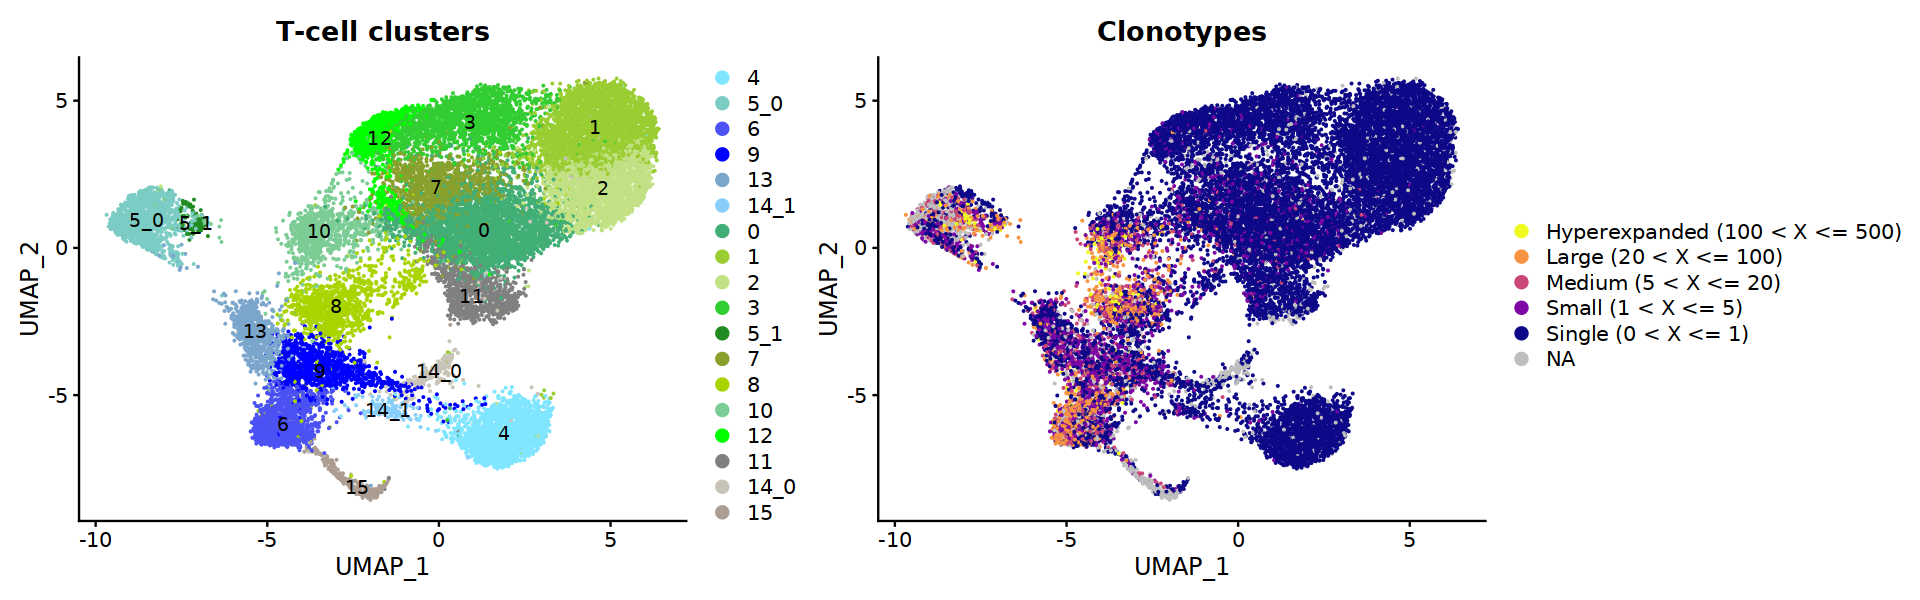

In [31]:
options(repr.plot.width = 16, repr.plot.height = 5, warn=-1,verbose = FALSE)
p_clust + p_clono

Consider only CDR3 Bchain region

In [32]:
col_name <- "cdr3"

## Plotting expansion

In [33]:
df_tmp <- seurat_tcr@meta.data %>% 
    
    group_by(timepoint, !!as.name(col_name)) %>%
    summarise(
        count = n()) %>% 
    dplyr::filter(!is.na(cdr3)) %>%
    mutate(category = case_when(
        is.na(cdr3) ~ "noTCR",
        count == 1~ "singlet",
        count > 20  ~ "X > 20",
        count > 10 & count <= 20 ~ "10 < X <= 20",
        count > 5 & count <= 10 ~ "5 < X <= 10",
        count > 1 & count <= 5 ~ "1 < X <= 5")) %>%
    arrange(desc(count)) 

In [34]:
totals <- as.data.frame(table(seurat_tcr@meta.data$timepoint))
colnames(totals) <- c("timpoint", "total")

In [35]:
df_plot2 <- df_tmp %>%
  group_by(timepoint, category) %>%
  summarise(count = n()) %>%
   arrange(desc(timepoint)) 
df_plot2

timepoint,category,count
<chr>,<chr>,<int>
T7,1 < X <= 5,426
T7,10 < X <= 20,19
T7,5 < X <= 10,44
T7,X > 20,16
T7,singlet,7771
T6,1 < X <= 5,106
T6,10 < X <= 20,4
T6,5 < X <= 10,8
T6,X > 20,1


In [36]:
df_plot2$category <- factor(df_plot2$category, levels = rev(c("noTCR", "singlet",
                                                              "1 < X <= 5", 
                                                              "5 < X <= 10", 
                                                              "10 < X <= 20", 
                                                              "X > 20")))
df_plot2$timepoint <- factor(df_plot2$timepoint, levels = unique(df_plot2$timepoint))

In [37]:
df_plot3 <- df_plot2 %>%
    dplyr::filter(category != "singlet") %>%
    group_by(timepoint) %>%
    mutate(prop = count/sum(count)) %>%
    ungroup()

df_plot3$timepoint <- factor(df_plot3$timepoint, levels = unique(rev(df_plot3$timepoint)))

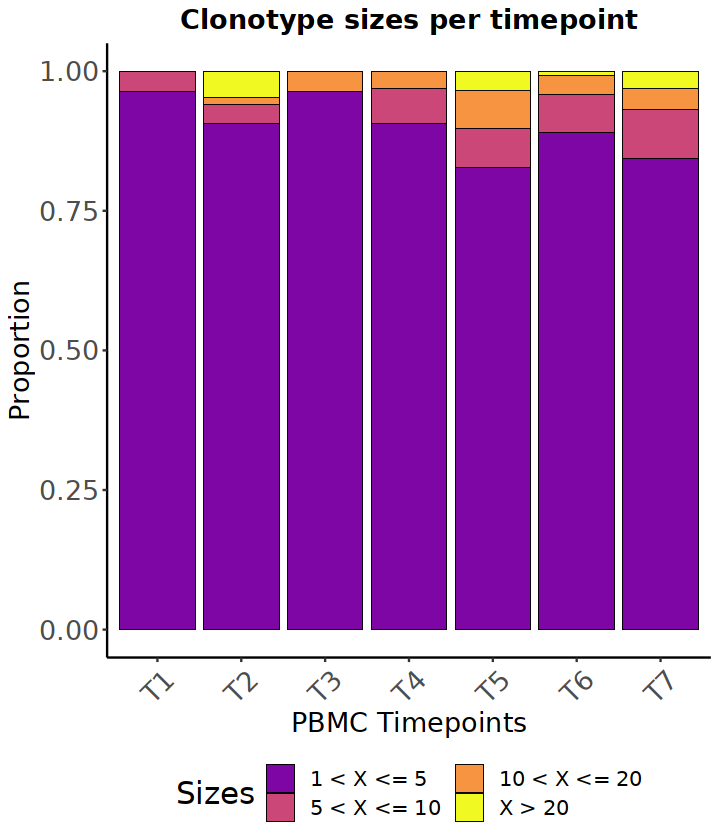

In [38]:
options(repr.plot.width = 6, repr.plot.height = 7, warn=-1,verbose = FALSE)
    plt <- ggplot(df_plot3, aes_string(x = "timepoint", y = "prop", fill = "category")) +
      geom_bar(stat = "identity",colour = "black",size = 0.2) +

      labs(title = "Clonotype sizes per timepoint",
           x = "PBMC Timepoints",
           y = "Proportion",
           fill = "Sizes") +
        scale_fill_manual(breaks = c("1 < X <= 5", "5 < X <= 10", 
                                        "10 < X <= 20", "X > 20"),
                             values = c('#7D06A5','#CA4778','#F69441','#F0F921')) + 
      theme_classic() +
      theme(plot.title = element_text(hjust = 0.5, size = 16, face = "bold"),
            axis.title.x = element_text(size = 16),
            axis.text.x = element_text(size = 16, angle=45, hjust = 0.5, vjust = 0.5), 
            axis.title.y = element_text(size = 16), 
            axis.text.y = element_text(size = 16),
            text = element_text(size = 18),
            legend.text = element_text(size = 12),
            legend.position="bottom") +
      guides(fill = guide_legend(title = "Sizes", ncol = 2))
    
    plt

In [39]:
ggsave(plot = plt, file=here(glue("{tcr}/{plt_dir}/5.0-barplot_clono_tps.svg")),
          width=6, height=7)

## CD8 T-Cells

In [40]:
subset_obj <- subset(seurat_tcr, idents=cd8_clusters)

In [41]:
print(table(rowSums(as.matrix(subset_obj[['RNA']]@counts)) == 0))
  
keep_genes <- data.frame(rowSums(as.matrix(subset_obj[['RNA']]@counts)) != 0)
colnames(keep_genes) <- "logical"
keep_genes <- subset(keep_genes, logical==TRUE)
subset_obj[['RNA']]@data <- subset_obj[['RNA']]@data[rownames(keep_genes), ]
subset_obj[['RNA']]@counts <- subset_obj[['RNA']]@counts[rownames(keep_genes), ]

subset_obj <- subset_obj %>% 
        NormalizeData(
            normalization.method = "LogNormalize",
            scale.factor = 1e4)


FALSE  TRUE 
24746  3041 


In [42]:
# Example named list of gene functionalities
gene_functionality <- list("Effector\nmolecules" = c("IFNG", "NKG7", "PRF1", "GZMK", "GZMB", "GZMA", "GZMH","FASLG"),
                "Costimulation and\nActivation"= c("CD27", "CD82", "TNFRSF4", "TNFRSF9", "CXCR3"), 
                "Coinhibitory\nReceptors"=c("PDCD1", "LAG3", "TIGIT", "HAVCR2"),
                "Exhaustion\nMarkers"=c("TOX", "ENTPD1", "BATF", "PRDM1"), 
                "Chemokines"=c("CCL3", "CCL4", "CCL5", "CXCL13"),
                "Proliferation"=c("STMN1", "MKI67", "UBE2C", "PCLAF"),
                "Residency"=c("ITGAE", "ZNF683", "CD44", "ITGA1", "CD69"))

Pseudo-bulk per cluster

In [43]:
list_objects <- SplitObject(subset_obj, split.by = "ident")
col_names <-  names(list_objects)

counts <- matrix(nrow=dim(list_objects[[1]]@assays$RNA@counts)[1], ncol=0)
lib_sizes <- c()

for (d in col_names){
  obj <- list_objects[[d]]
  
  m <- as.matrix(obj@assays$RNA@counts)
  c <- rowSums(m)
  counts <- cbind(counts, c)
  
  ls <- sum(colSums(m))
  lib_sizes <- c(lib_sizes, ls)
}
colnames(counts)<-col_names

logcpm <- counts
for (i in seq_along(names(list_objects))){
  ls <- lib_sizes[i]
  d <- colnames(logcpm)[i]
  logcpm[, d]<-log2((logcpm[, d]/ls*1e6)+1) 
}

# scaling as z-scoring 
mat1 <- t(scale(t(logcpm)))
mat1 <- mat1[unlist(gene_functionality, use.names = F),]

# Sorting clusters by GZMH gene
mat1 <- mat1[,order(mat1["GZMH",])]
df_col <- data.frame(CD8_clusters=colnames(mat1))
row.names(df_col) <- colnames(mat1)

In [44]:
# Create a factor that indicates the functionality for each gene
gene_to_functionality <- unlist(lapply(names(gene_functionality), function(x) {
  setNames(rep(x, length(gene_functionality[[x]])), gene_functionality[[x]])
}))
functionality_factor <- factor(gene_to_functionality[rownames(mat1)], levels = names(gene_functionality))

In [45]:
heatmap <- Heatmap(
  mat1,
  col = rev(c('#a50026','#d73027','#f46d43','#fdae61','#fee090','#ffffbf','#e0f3f8','#abd9e9','#74add1','#4575b4','#313695')),
  name = "z-score\nnorm. expr.",
  column_title = "CD8 clusters",
  cluster_columns = FALSE,
  cluster_rows = FALSE,
  show_row_names = TRUE,
  show_column_names = FALSE,
  column_title_gp = gpar(fontsize = 14, fontface = "bold"),
  row_names_gp = gpar(fontsize = 12),
  top_annotation = HeatmapAnnotation(
      text = anno_text(colnames(mat1), rot = 45,
                      offset = unit(1, "npc"),just = "center", 
                      height=unit(0.5, "cm")), 
      df = df_col, 
      col = list(CD8_clusters=pbmc_pal[as.character(cd8_clusters)]),
      show_annotation_name = FALSE),
 heatmap_legend_param = list(legend_direction = "horizontal", 
                                legend_width = unit(5, "cm")),
    
  row_split = functionality_factor,
)

svg(here(glue("{tcr}/{plt_dir}/5.0-CD8_markers_heatmap.svg")),
   width = 4, height = 13)
draw(heatmap, merge_legend = TRUE, column_dend_side = "bottom",heatmap_legend_side = "bottom",
    padding = unit(c(2, 10, 5,15), "mm"))
dev.off()

png 
  2

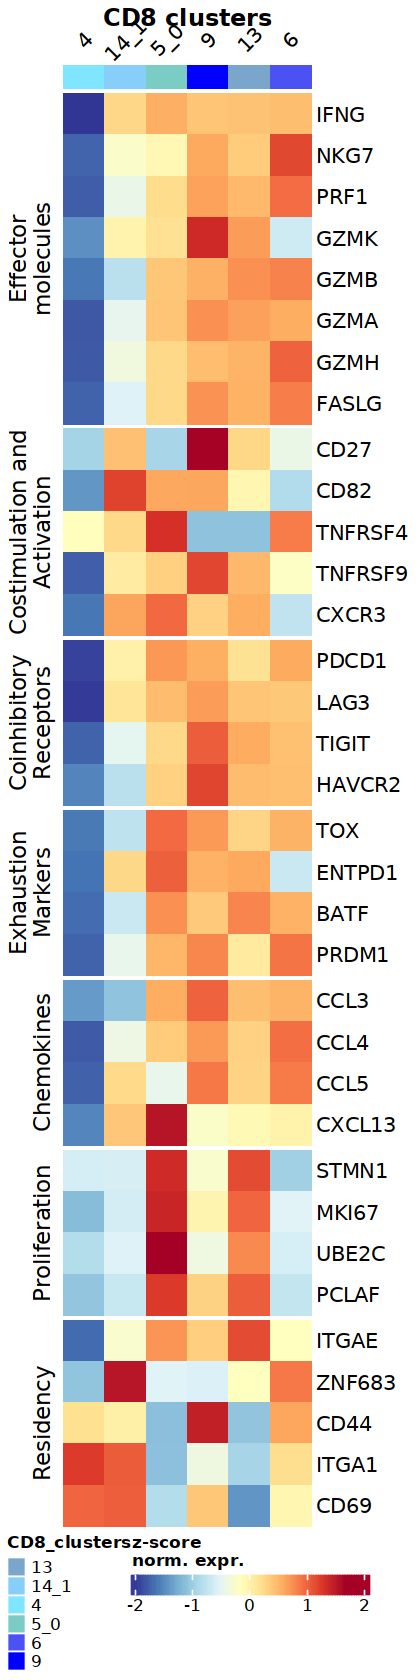

In [46]:
options(repr.plot.width = 3.5, repr.plot.height = 14, warn=-1,verbose = FALSE)
draw(heatmap, merge_legend = TRUE, column_dend_side = "bottom",heatmap_legend_side = "bottom")

## CD4 T-Cells

In [47]:
subset_obj <- subset(seurat_tcr, idents=cd4_clusters)

In [48]:
print(table(rowSums(as.matrix(subset_obj[['RNA']]@counts)) == 0))
  
keep_genes <- data.frame(rowSums(as.matrix(subset_obj[['RNA']]@counts)) != 0)
colnames(keep_genes) <- "logical"
keep_genes <- subset(keep_genes, logical==TRUE)
subset_obj[['RNA']]@data <- subset_obj[['RNA']]@data[rownames(keep_genes), ]
subset_obj[['RNA']]@counts <- subset_obj[['RNA']]@counts[rownames(keep_genes), ]

subset_obj <- subset_obj %>% 
        NormalizeData(
            normalization.method = "LogNormalize",
            scale.factor = 1e4)


FALSE  TRUE 
26477  1310 


#### Viz dotplot

In [49]:
markers = c("FOXP3","CTLA4","TIGIT","BATF","CXCR4","SELL", "IL7R", 
            "TCF7", "LEF1", "CCR7", "CCR6", "RORA", "RORC",
            "CXCR3", "IFNG","CD40LG", "ICOS","GZMA", "GZMK","PRF1", 
            "MKI67", "STMN1")

In [50]:
# custom order
ord_annot <- c("12", "3", "1", "2", "7", "8","0", "10", "5_1")

In [51]:
# sort 
subset_obj$Tcell_clusters <- factor(subset_obj$Tcell_clusters, levels= ord_annot)

Pseudo-bulk per cluster

In [52]:
list_objects <- SplitObject(subset_obj, split.by = "ident")
col_names <-  names(list_objects)

counts <- matrix(nrow=dim(list_objects[[1]]@assays$RNA@counts)[1], ncol=0)
lib_sizes <- c()

for (d in col_names){
  obj <- list_objects[[d]]
  
  m <- as.matrix(obj@assays$RNA@counts)
  c <- rowSums(m)
  counts <- cbind(counts, c)
  
  ls <- sum(colSums(m))
  lib_sizes <- c(lib_sizes, ls)
}
colnames(counts)<-col_names

logcpm <- counts
for (i in seq_along(names(list_objects))){
  ls <- lib_sizes[i]
  d <- colnames(logcpm)[i]
  logcpm[, d]<-log2((logcpm[, d]/ls*1e6)+1) 
}

# scaling as z-scoring 
mat1 <- t(scale(t(logcpm)))
mat1 <- mat1[unlist(markers, use.names = F),]

In [53]:
# compute pecentatge of cells expressing each gene
percent_expression <- matrix(nrow = nrow(list_objects[[1]]@assays$RNA@counts), ncol = 0)

for (d in col_names) {
  obj <- list_objects[[d]]
  
  m <- as.matrix(obj@assays$RNA@counts)
  percent_expr <- rowMeans(m > 0) * 100  # Calculate the percentage of cells with non-zero expression
  percent_expression <- cbind(percent_expression, percent_expr)
}

colnames(percent_expression) <- col_names
rownames(percent_expression) <- rownames(list_objects[[1]]@assays$RNA@counts)

In [54]:
expression_df <- as.data.frame(mat1) %>%
    rownames_to_column(var = "Gene")

expression_df <- expression_df %>%
    pivot_longer(
        cols = -Gene, 
        names_to = "CD4 Clusters",  
        values_to = "Expression")

In [55]:
percent_expression_df <- as.data.frame(percent_expression) %>%
  rownames_to_column(var = "Gene") %>%
  pivot_longer(
    cols = -Gene,
    names_to = "CD4 Clusters",
    values_to = "PercentExpressing"
  )
expression_df <- left_join(expression_df, percent_expression_df, by = c("Gene", "CD4 Clusters"))

In [56]:
# set order
expression_df[["CD4 Clusters"]] <- factor(expression_df[["CD4 Clusters"]],
                                              levels=ord_annot)

expression_df[["Gene"]] <- factor(expression_df[["Gene"]],
                                              levels=markers)

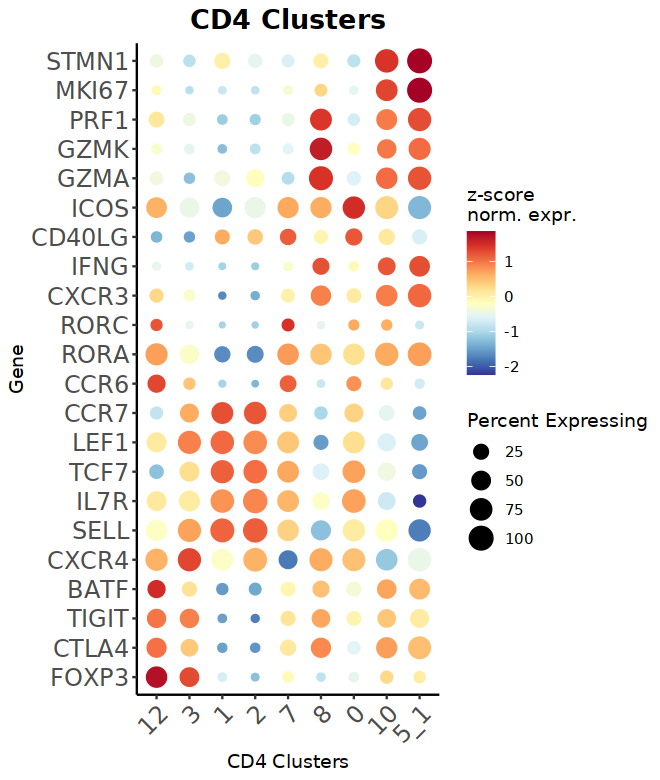

In [57]:
options(repr.plot.width = 5.5,repr.plot.height = 6.5, warn=-1,verbose = FALSE)
dp <-  ggplot(expression_df, aes(x = `CD4 Clusters`, y = Gene)) +
  geom_point(aes(size = PercentExpressing, color = Expression)) +
  theme_classic() +
  scale_colour_gradientn(colors = rev(c('#a50026','#d73027','#f46d43','#fdae61','#fee090','#ffffbf',
                                        '#e0f3f8','#abd9e9','#74add1','#4575b4','#313695')), name = "z-score\nnorm. expr.") +
  ggtitle("CD4 Clusters") + 
  theme(plot.title = element_text(hjust = 0.5, size = 16, face = "bold"),
        axis.text.x = element_text(angle = 45, hjust = 1, size = 14),
        axis.text.y = element_text(size = 14),
        legend.position = "right",           
        legend.direction = "vertical",          
        legend.box = "vertical") +
  labs(x = "CD4 Clusters", y = "Gene", color = "Expression", size = "Percent Expressing") 
dp

In [58]:
ggsave(plot = dp, width =5.5, height = 6.5, dpi = 300, 
       file = here::here(glue::glue("{tcr}/{plt_dir}/5.0-CD4_dotplot_PBMC.svg")))

## Save

In [59]:
saveRDS(seurat_tcr, here(glue("{tcr}/{robj_dir}/5.0-pbmcTCR_{mode}_{chain}.rds")))

## Session Info

In [60]:
sessionInfo()

R version 4.1.1 (2021-08-10)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: CentOS Linux 7 (Core)

Matrix products: default
BLAS/LAPACK: /home/groups/singlecell/isentis/conda_envs/ines_r4.1.1c/lib/libopenblasp-r0.3.24.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=es_ES.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=es_ES.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=es_ES.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=es_ES.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] grid      stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
 [1] ComplexHeatmap_2.10.0 lubridate_1.9.3       forcats_1.0.0        
 [4] stringr_1.5.0         dplyr_1.1.3           purrr_1.0.2          
 [7] readr_2.1.4           tidyr_1.3.0           tibble_3.2.1         
[10] tidyverse_2.0.0       glue_1.6.2            here_